In [2]:
#导入源数据
import pandas as pd
data = pd.read_excel("数字化二次处理.xlsx")

int64


In [9]:
#删除没有数字化的数据
names = data.columns
for name in names:
    if data[name].dtypes != int:
        del data[name]
        assert(name not in data.columns)
print(data.shape)

(6818, 165)


In [27]:
#构造真实值
out = data.iloc[:,-8:].astype('float')
out_mean = out.mean(axis=1)
out_mean = out_mean.mask(out_mean<3, 0)
out_mean = out_mean.mask(out_mean>=3, 1)

out_sum = out.mask(out<3, 0)
out_sum = out_sum.mask(out_sum>=3, 1)
out_sum = out_sum.sum(axis=1)
out_sum = out_sum.mask(out_sum<5, 0)
out_sum = out_sum.mask(out_sum>=5, 1)

new_out = out_mean + out_sum
new_out = new_out.mask(new_out<2,0)
new_out = new_out.mask(new_out==2,1)
print(new_out.shape)
assert(1 in new_out)

(6818,)


In [30]:
#划分数据集为训练集和训练集，按7:3的比例
import random
ratio = 0.7
train_index = random.sample(list(range(len(data))),int(ratio*len(data)))
test_index = []
for i in range(len(data)):
    if i not in train_index:
        test_index.append(i)

train_x = data[data.index.isin(train_index)].iloc[:,0:-8]
train_y = new_out[new_out.index.isin(train_index)]
test_x = data[data.index.isin(test_index)].iloc[:,0:-8]
test_y = new_out[new_out.index.isin(test_index)]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(4772, 157)
(4772,)
(2046, 157)
(2046,)


In [32]:
!pip install shap

     |████████████████████████████████| 433 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 11.8 MB/s eta 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9


 99%|===================| 4727/4772 [01:43<00:00]        findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
Glyph 25105 missing from current font.
Glyph 32463 missing from current font.
Glyph 24120 missing from current font.
Glyph 24863 missing from current font.
Glyph 21040 missing from current font.
Glyph 28966 missing from current font.
Glyph 34385 missing from current font.
Glyph 21644 missing from current font.
Glyph 19981 missing from current font.
Glyph 23433 missing from current font.
Glyph 29983 missing from current font.
Glyph 27963 missing from current font.
Glyph 26543 missing from current font.
Glyph 29157 missing from current font.
Glyph 26080 missing from current font.
Glyph 21619 missing from current font.
Glyph 33021 missing from current font.
Glyph 24456 missing from current font.
Glyph 22909 missing from current font.
Glyph 22320 missing from current font.
Glyph 213

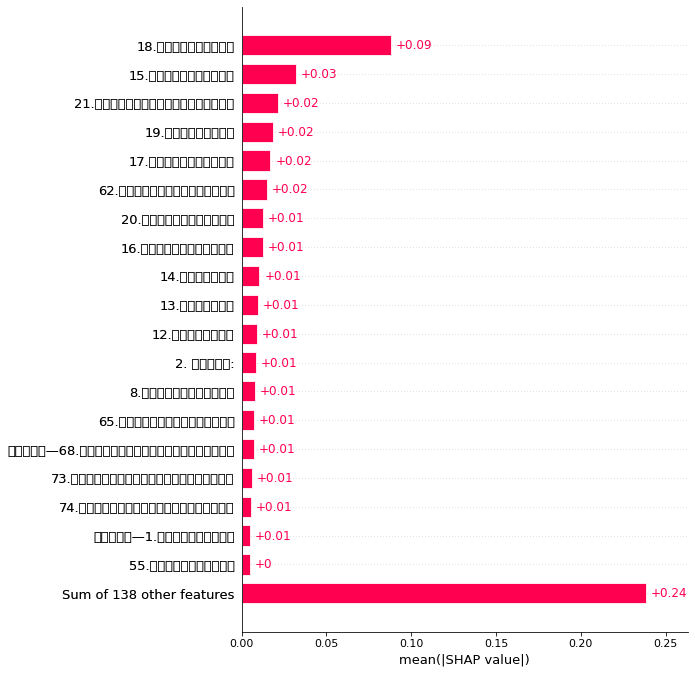

In [34]:
#随机森林树
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

rf = RandomForestRegressor()
rf.fit(train_x,train_y)
explainer = shap.Explainer(rf,train_x)
shap_values = explainer(train_x)
shap.plots.bar(shap_values, max_display=20)



In [21]:
a = {'col1':[1,2],'col2':[3,4]}
b = {'col1':[5,6],'col3':[3,4]}
a = pd.DataFrame(data=a)
b = pd.DataFrame(data=b)
a = a.sum(axis=1)
b = b.sum(axis=1)
c = a+b
print(c)

0    12
1    16
dtype: int64


In [3]:
# %load test.py

#导入要用的程序包
import pandas as pd
import random
from sklearn.metrics import accuracy_score as acs
#导入程序
data = pd.read_excel("数字化二次处理.xlsx")
#数据清理
del data['序号']

school = list(set(data['学校']))
s = []
for i in range(len(data)):
    s.append(school.index(data['学校'].iloc[i]))
data['学校'] = s
#%%
for i in range(len(data)):
    for j in [-8,-7,-6,-5,-4,-3,-2,-1]:
        if data.iloc[i,j] in [1,2,3]:
            data.iloc[i,j] = 0
        elif data.iloc[i,j] in [4,5,6]:
            data.iloc[i,j] = 1   

#%%
#训练集规模，按全体样本的0.9作为训练集，剩下的是测试集
r = 0.9
train_index = random.sample(list(range(len(data))),int(r*len(data)))
test_index = []
for i in range(len(data)):
    if i not in train_index:
        test_index.append(i)

train_data = data[data.index.isin(train_index)]
test_data = data[data.index.isin(test_index)]

x_t = train_data.iloc[:,0:-8]
y_train_mean = train_data.iloc[:,-8:].mean(axis=1)
y_t_1 = train_data.iloc[:,-8]
y_t_2 = train_data.iloc[:,-7]
y_t_3 = train_data.iloc[:,-6]
y_t_4 = train_data.iloc[:,-5]
y_t_5 = train_data.iloc[:,-4]
y_t_6 = train_data.iloc[:,-3]
y_t_7 = train_data.iloc[:,-2]
y_t_8 = train_data.iloc[:,-1]

x = test_data.iloc[:,0:-8]
y_test_mean = test_data.iloc[:,-8:].mean(axis=1)
y_1 = test_data.iloc[:,-8]
y_2 = test_data.iloc[:,-7]
y_3 = test_data.iloc[:,-6]
y_4 = test_data.iloc[:,-5]
y_5 = test_data.iloc[:,-4]
y_6 = test_data.iloc[:,-3]
y_7 = test_data.iloc[:,-2]
y_8 = test_data.iloc[:,-1]

#建立变量储存预测准确率结果
result = []
result.append(['焦虑情绪','抑郁情绪','烦躁情绪','失眠情况',
               '工作压力','家庭压力','经济压力','人际压力','八个指标的均值'])
#开始模型学习和预测
#XGB模型
from xgboost import XGBClassifier
RFC = XGBClassifier()
RFC.fit(x_t, y_train_mean) #new
p_y_mean = RFC.predict(x) #new
RFC.fit(x_t, y_t_1)
p_y_1 = RFC.predict(x)
RFC.fit(x_t, y_t_2)
p_y_2 = RFC.predict(x)
RFC.fit(x_t, y_t_3)
p_y_3 = RFC.predict(x)
RFC.fit(x_t, y_t_4)
p_y_4 = RFC.predict(x)
RFC.fit(x_t, y_t_5)
p_y_5 = RFC.predict(x)
RFC.fit(x_t, y_t_6)
p_y_6 = RFC.predict(x)
RFC.fit(x_t, y_t_7)
p_y_7 = RFC.predict(x)
RFC.fit(x_t, y_t_8)
p_y_8 = RFC.predict(x)
result.append([acs(y_test_mean,p_y_mean),acs(y_1,p_y_1),acs(y_2,p_y_2),acs(y_3,p_y_3),acs(y_4,p_y_4),acs(y_5,p_y_5),acs(y_6,p_y_6),acs(y_7,p_y_7),acs(y_8,p_y_8)])
#随机森林模型
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_t, y_train_mean) #new
p_y_mean = RFC.predict(x) #new
RFC.fit(x_t, y_t_1)
p_y_1 = RFC.predict(x)
RFC.fit(x_t, y_t_2)
p_y_2 = RFC.predict(x)
RFC.fit(x_t, y_t_3)
p_y_3 = RFC.predict(x)
RFC.fit(x_t, y_t_4)
p_y_4 = RFC.predict(x)
RFC.fit(x_t, y_t_5)
p_y_5 = RFC.predict(x)
RFC.fit(x_t, y_t_6)
p_y_6 = RFC.predict(x)
RFC.fit(x_t, y_t_7)
p_y_7 = RFC.predict(x)
RFC.fit(x_t, y_t_8)
p_y_8 = RFC.predict(x)
result.append([acs(y_test_mean,p_y_mean),acs(y_1,p_y_1),acs(y_2,p_y_2),acs(y_3,p_y_3),acs(y_4,p_y_4),acs(y_5,p_y_5),acs(y_6,p_y_6),acs(y_7,p_y_7),acs(y_8,p_y_8)])
#极限提升树模型
from sklearn.ensemble import ExtraTreesClassifier
RFC = ExtraTreesClassifier()
RFC.fit(x_t, y_train_mean) #new
p_y_mean = RFC.predict(x) #new
RFC.fit(x_t, y_t_1)
p_y_1 = RFC.predict(x)
RFC.fit(x_t, y_t_2)
p_y_2 = RFC.predict(x)
RFC.fit(x_t, y_t_3)
p_y_3 = RFC.predict(x)
RFC.fit(x_t, y_t_4)
p_y_4 = RFC.predict(x)
RFC.fit(x_t, y_t_5)
p_y_5 = RFC.predict(x)
RFC.fit(x_t, y_t_6)
p_y_6 = RFC.predict(x)
RFC.fit(x_t, y_t_7)
p_y_7 = RFC.predict(x)
RFC.fit(x_t, y_t_8)
p_y_8 = RFC.predict(x)
result.append([acs(y_test_mean,p_y_mean),acs(y_1,p_y_1),acs(y_2,p_y_2),acs(y_3,p_y_3),acs(y_4,p_y_4),acs(y_5,p_y_5),acs(y_6,p_y_6),acs(y_7,p_y_7),acs(y_8,p_y_8)])
#支持向量机模型
from sklearn.svm import SVC
RFC = SVC()
RFC.fit(x_t, y_train_mean) #new
p_y_mean = RFC.predict(x) #new
RFC.fit(x_t, y_t_1)
p_y_1 = RFC.predict(x)
RFC.fit(x_t, y_t_2)
p_y_2 = RFC.predict(x)
RFC.fit(x_t, y_t_3)
p_y_3 = RFC.predict(x)
RFC.fit(x_t, y_t_4)
p_y_4 = RFC.predict(x)
RFC.fit(x_t, y_t_5)
p_y_5 = RFC.predict(x)
RFC.fit(x_t, y_t_6)
p_y_6 = RFC.predict(x)
RFC.fit(x_t, y_t_7)
p_y_7 = RFC.predict(x)
RFC.fit(x_t, y_t_8)
p_y_8 = RFC.predict(x)
result.append([acs(y_test_mean,p_y_mean),acs(y_1,p_y_1),acs(y_2,p_y_2),acs(y_3,p_y_3),acs(y_4,p_y_4),acs(y_5,p_y_5),acs(y_6,p_y_6),acs(y_7,p_y_7),acs(y_8,p_y_8)])
#逻辑斯蒂模型
from sklearn.linear_model import LogisticRegression
RFC = LogisticRegression(solver ='liblinear')
RFC.fit(x_t, y_train_mean) #new
p_y_mean = RFC.predict(x) #new
RFC.fit(x_t, y_t_1)
p_y_1 = RFC.predict(x)
RFC.fit(x_t, y_t_2)
p_y_2 = RFC.predict(x)
RFC.fit(x_t, y_t_3)
p_y_3 = RFC.predict(x)
RFC.fit(x_t, y_t_4)
p_y_4 = RFC.predict(x)
RFC.fit(x_t, y_t_5)
p_y_5 = RFC.predict(x)
RFC.fit(x_t, y_t_6)
p_y_6 = RFC.predict(x)
RFC.fit(x_t, y_t_7)
p_y_7 = RFC.predict(x)
RFC.fit(x_t, y_t_8)
p_y_8 = RFC.predict(x)
result.append([acs(y_test_mean,p_y_mean),acs(y_1,p_y_1),acs(y_2,p_y_2),acs(y_3,p_y_3),acs(y_4,p_y_4),acs(y_5,p_y_5),acs(y_6,p_y_6),acs(y_7,p_y_7),acs(y_8,p_y_8)])
#%%
result = pd.DataFrame(result).T
result.columns = ['目标','XGB','RFC','ETC','SVC','LOG']
print(result)
#%%
##使用SHAP包计算变量重要性并且绘图
import shap
explainer = shap.Explainer(RFC,x_t)
shap_values = explainer(x_t) 
#%%
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#%%
RFC.fit(x_t, y_test_mean)
explainer = shap.Explainer(RFC,x_t)
shap_values = explainer(x_t)
shap.plots.bar(shap_values,max_display=20)

RFC.fit(x_t, y_t_1)
explainer = shap.Explainer(RFC,x_t)
shap_values = explainer(x_t) 
shap.plots.bar(shap_values,max_display=20)

RFC.fit(x_t, y_t_2)
explainer = shap.Explainer(RFC,x_t)
shap_values = explainer(x_t) 
shap.plots.bar(shap_values,max_display=20)

RFC.fit(x_t, y_t_3)
explainer = shap.Explainer(RFC,x_t)
shap_values = explainer(x_t) 
shap.plots.bar(shap_values,max_display=20)

RFC.fit(x_t, y_t_4)
explainer = shap.Explainer(RFC,x_t)
shap_values = explainer(x_t) 
shap.plots.bar(shap_values,max_display=20)

RFC.fit(x_t, y_t_5)
explainer = shap.Explainer(RFC,x_t)
shap_values = explainer(x_t) 
shap.plots.bar(shap_values,max_display=20)

RFC.fit(x_t, y_t_6)
explainer = shap.Explainer(RFC,x_t)
shap_values = explainer(x_t) 
shap.plots.bar(shap_values,max_display=20)

RFC.fit(x_t, y_t_7)
explainer = shap.Explainer(RFC,x_t)
shap_values = explainer(x_t) 
shap.plots.bar(shap_values,max_display=20)

RFC.fit(x_t, y_t_8)
explainer = shap.Explainer(RFC,x_t)
shap_values = explainer(x_t) 
shap.plots.bar(shap_values,max_display=20)








XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Users/jianghua/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/jianghua/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']
